<a href="https://colab.research.google.com/github/HarshJain41/Netflix-Movies-TVShow-Clustering/blob/main/Copy_of_Copy_of_Final_Netflix_movie_TV_show_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies And TV Shows Clustering**

---------------------------------------------

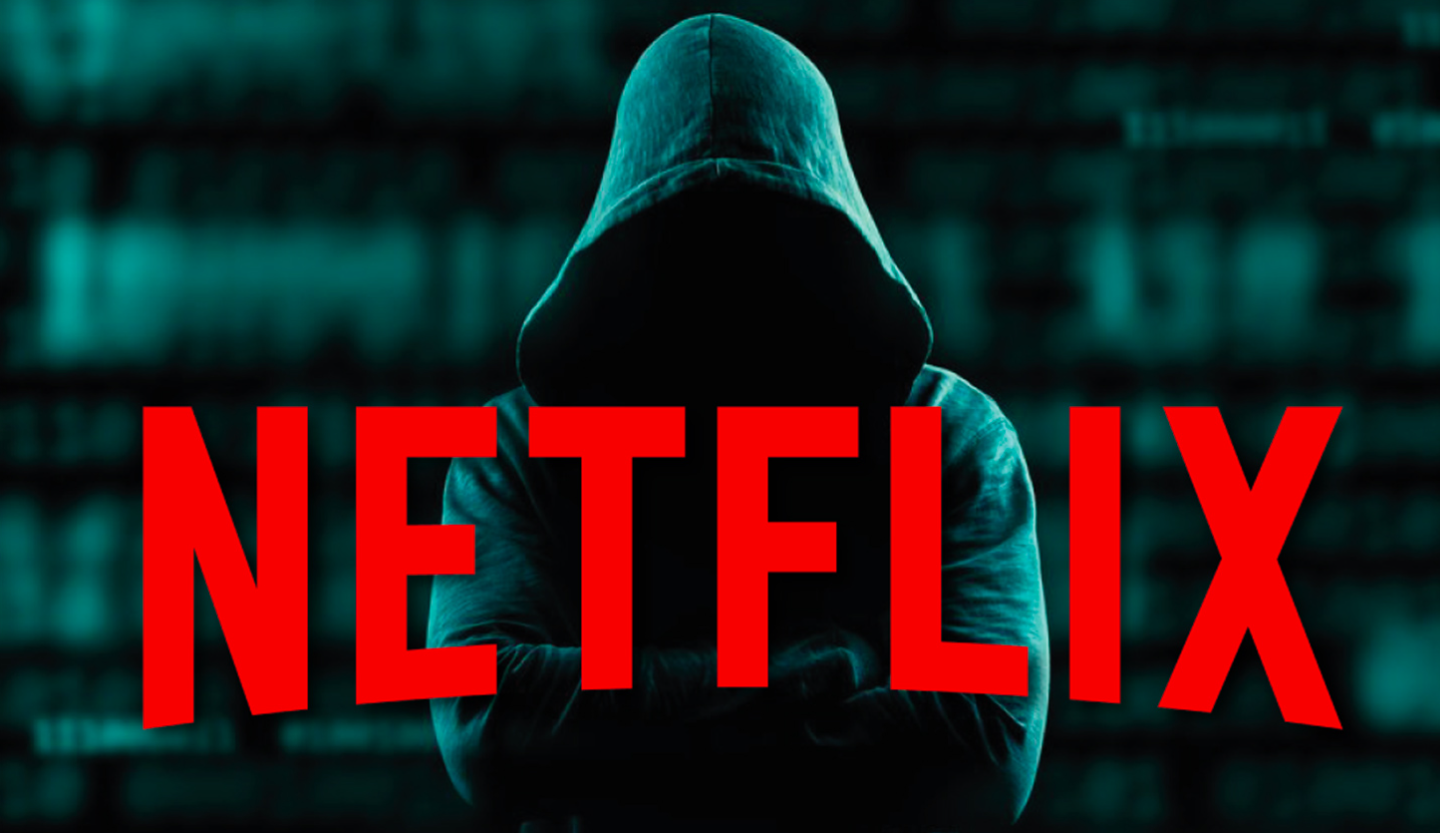

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Netflix Movies and TV Shows Clustering is a data analysis and machine learning technique that Netflix uses to group their content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast and plot, and using algorithms to identify patterns and similarities. In this way, Netflix can provide its users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, which will lead to increased retention and company revenue.

Netflix Movies and TV Shows Clustering is a data-driven approach that Netflix uses to group its vast library of content into similar categories. The process involves collecting and analyzing various data points such as genre, cast, director, plot and other relevant features. Netflix will then use unsupervised machine learning algorithms to identify patterns and similarities between different titles.

Algorithms used in this process include clustering techniques such as k-means, hierarchical clustering, and principal component analysis (PCA). These algorithms help Netflix group movies and TV shows with similar features into distinct groups, each representing a unique genre or category.

The ultimate goal of this clustering is to improve the user experience on Netflix by providing personalized content recommendations to users based on their viewing history and preferences. By organizing the content library into clusters, Netflix can suggest titles to users that are more likely to match their interests, making it more likely that users will stay engaged with the platform.

In addition to improving user satisfaction, clustering also helps Netflix make data-driven decisions about content production and licensing. By understanding underlying trends and patterns in user behavior, Netflix can make informed decisions about which titles to produce or acquire and which to remove from its platform. This ultimately helps increase customer retention and company revenue.

# **GitHub Link 👇🏻**

Provide your GitHub Link here.

# **Problem Statement👇🏻**



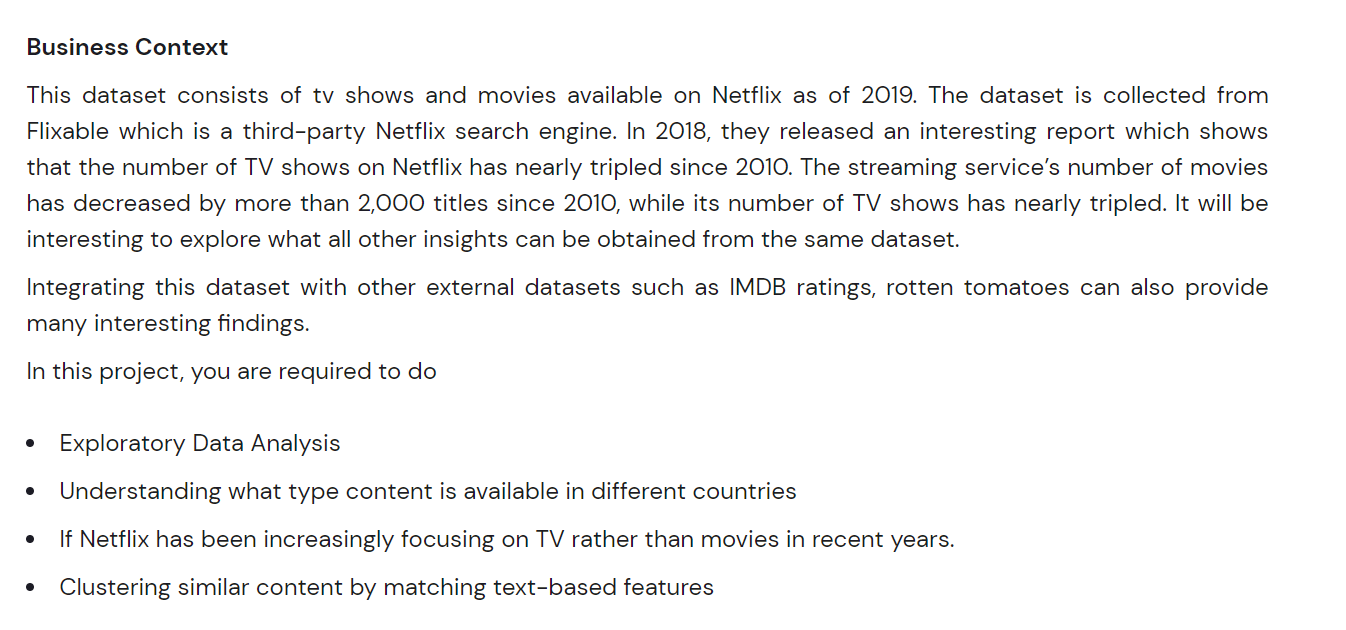

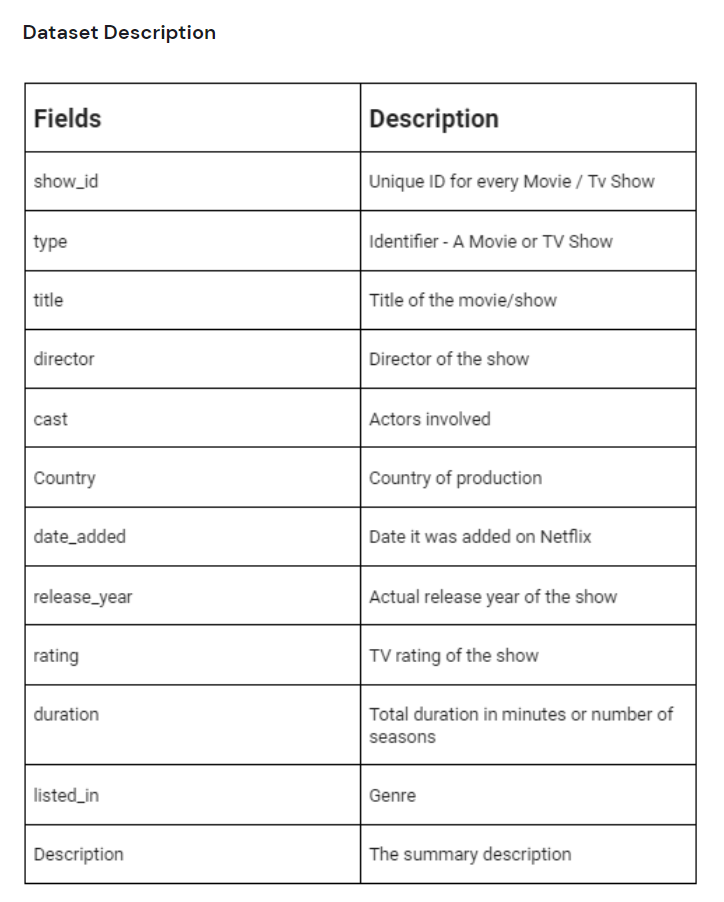

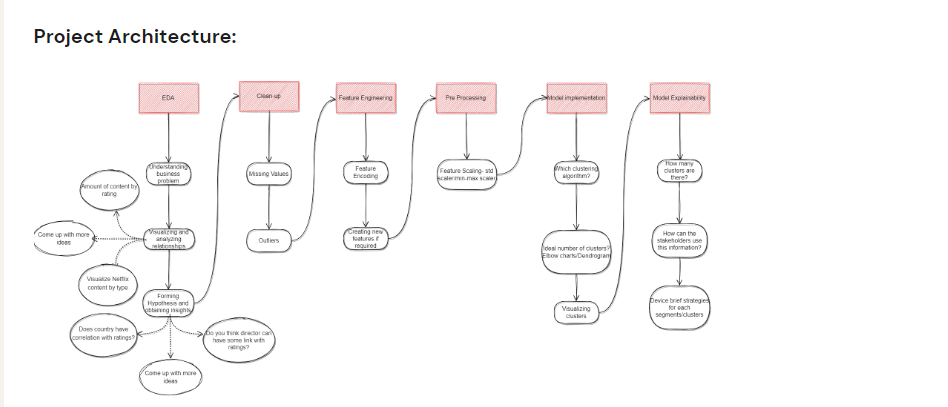

### Importing Necessary Libraries👇🏻

In [139]:
# Necessary Libraries
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')


In [140]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the given dataset👇🏻



In [141]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter Canberra/Module 4 - Machine Learning/Capstone Project 4 - Harsh Jain - Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View👇🏻

In [142]:
# Dataset First Look
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count👇🏻

In [143]:
# Dataset Rows & Columns count
data.shape

(7787, 12)

### Dataset Information👇🏻

In [144]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [145]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [146]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [147]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

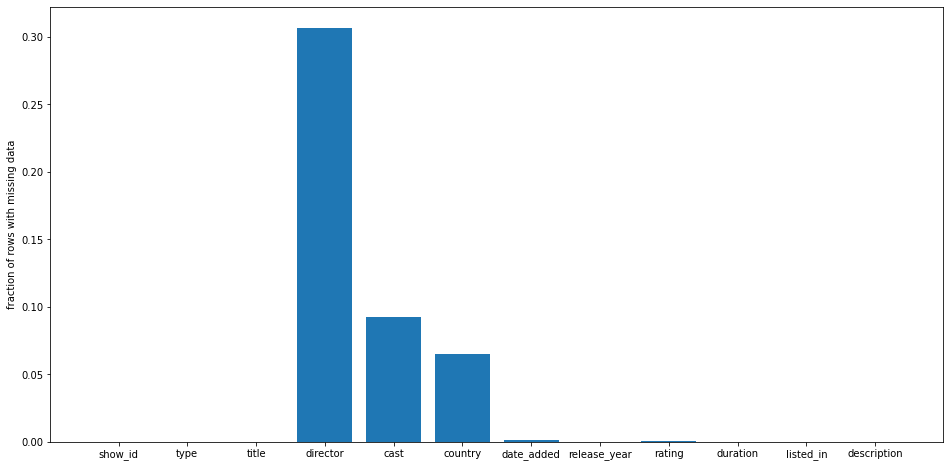

In [148]:
# null value distribution
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

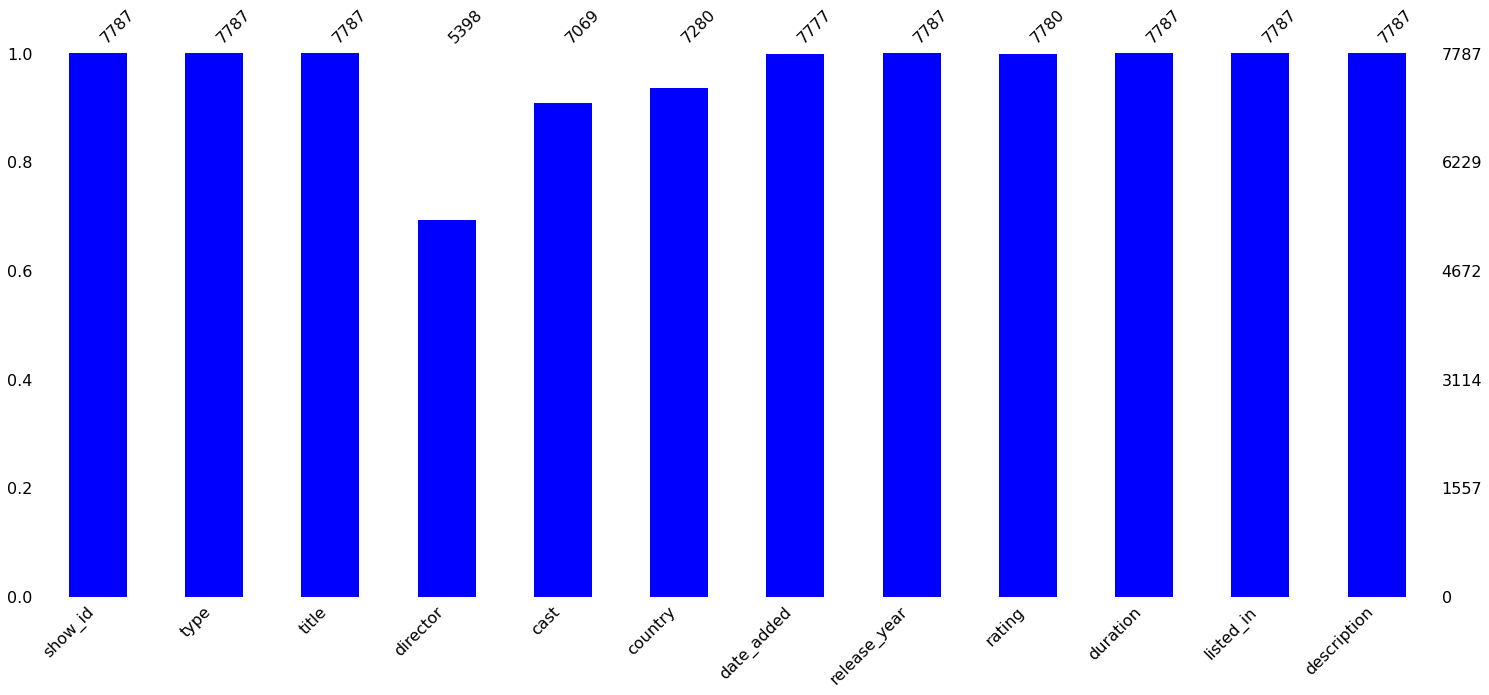

In [149]:
# Visualizing the missing values
import missingno as msno
msno.bar(data, color = 'blue')

### What did you know about your dataset?

As we can check most of the columns are not having any missing of null value except
- Director (2389)
- Cast (718)
- Country (507)
- Date_added (10)
- Rating (7) 

##  ***Understanding Our Variables👇🏻***

In [150]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [151]:
# Dataset Describe
data.describe(include = 'all')

show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 👇🏻

Only one column Release_Date is numerical type, rest all are strings. So, Describe is not very useful in this case. 

### Check Unique Values for each variable.

In [152]:
# Check Unique Values for each variable.
data.show_id.value_counts()

s1       1
s5172    1
s5200    1
s5199    1
s5198    1
        ..
s2592    1
s2591    1
s2590    1
s2589    1
s7787    1
Name: show_id, Length: 7787, dtype: int64

This shows that every row has a unique Id without any repeatation 

In [153]:
data.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

This shows that the data is divided into two types only. Movies and TV Shows 

In [154]:
data.title.value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [155]:
data.director.value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [156]:
data['cast'][0]

'João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'

In [157]:
data['cast'][10]

"Thomas Jane, Molly Parker, Dylan Schmid, Kaitlyn Bernard, Bob Frazer, Brian d'Arcy James, Neal McDonough"

We can check that though cast is a list but it is given as string which we need to change

In [158]:
data.country.value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

- We can see that most of the movies or shows are from United States, followed by India, United Kingdom, Japan and South Korea. 

In [159]:
data.release_year.value_counts()

2018    1121
2017    1012
2019     996
2016     882
2020     868
        ... 
1925       1
1964       1
1966       1
1947       1
1959       1
Name: release_year, Length: 73, dtype: int64

- We can see that most of the moves are release in the recent years, showning that recently Netflix is gaining more popularity, Though it was launched in 1997.
- The platform is also focusing on uploaded the newly launched moveies and shows 

In [160]:
data.date_added.value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

- We can see that the platform is increasing the addition of contents year by year

In [161]:
data.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [162]:
data.duration.value_counts()

1 Season     1608
2 Seasons     382
3 Seasons     184
90 min        136
93 min        131
             ... 
182 min         1
224 min         1
233 min         1
196 min         1
191 min         1
Name: duration, Length: 216, dtype: int64

In [163]:
data.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy                      1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 492, dtype: int64

In [164]:
data['listed_in'][0]

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [165]:
data.description[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

## ***Data Wrangling👇🏻***

### Data Wrangling Code

In [166]:
# converting the cast column into a list
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [167]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [168]:
#fillna() is a function in Pandas, a Python library for data analysis, that we used to replace missing (NaN) values in our DataFrame with a specified value.
data['cast'].fillna('No cast',inplace=True)
data['country'].fillna(data['country'].mode()[0],inplace=True)
data['director'].fillna('', inplace=True)

In [169]:
#'date_added' and 'rating' contains an lower and not much important portion of the data so we will drop them from our analysis.
data.dropna(subset=['date_added','rating'],inplace=True)

In [170]:
#isnull() is a function in Pandas, a Python library for data analysis, that is used to identify missing (NaN) values in a DataFrame.
data.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### So as we can check here the null values are replaced and read for EDA and TexT Preprocessing.

# **Exploratory Data Analysis👇🏻**

#### Chart - 1

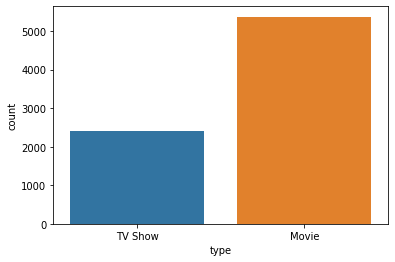

In [171]:
# Chart - 1 visualization code
sns.countplot(data['type'])
plt.show()

##### 1. Why did you pick the specific chart?

- There are only two types namely TV shows and Movies, so we want to check which are greater in number.

##### 2. What is/are the insight(s) found from the chart?

There are more obervations of Movies than TV shows in our dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Based on this insight, Netflix could potentially make informed decisions about the types of content to prioritize in its programming and marketing efforts. For example, if the data suggests that subscribers are more interested in movies than TV shows, Netflix could allocate more resources towards acquiring or producing movie content, or promoting existing movie content to increase engagement and retention.

#### Chart - 2

In [172]:
df_pie = data.groupby(['rating'])['show_id'].count().reset_index()

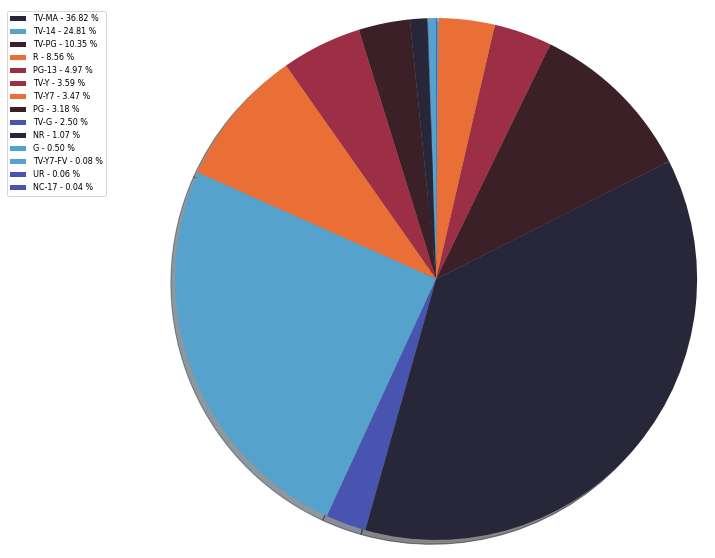

In [173]:
x = np.char.array(list(df_pie['rating'].values))
y = np.array(df_pie['show_id'].values)
colors = sns.color_palette('icefire')[0:14]
porcent = 100.*y/y.sum()
plt.figure(figsize = (10, 10))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow= True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

##### 1. Why did you pick the specific chart?

Rating is an important aspect for any content based platform and we want to analyse the different types of rating and the extent of content it has. 

##### 2. What is/are the insight(s) found from the chart?

* The majority of the rated content on Netflix falls into the TV-MA and TV-14 categories. 
* The high share of TV-MA and TV-14 rated content suggests that there is a significant audience for mature and teen-oriented content.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* This data can be used by advertisers to target their ads more effectively to the desired audience. Since different ratings may have different demographics, advertisers can use this data to plan and target their campaigns more accurately.

#### Chart - 3

In [174]:
# Chart - 3 - creating dataframe
df_release_year = data.groupby(['release_year','type'])['show_id'].count().reset_index()
df_release_year

release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
..            ...      ...      ...
113          2019  TV Show      414
114          2020    Movie      411
115          2020  TV Show      457
116          2021    Movie       12
117          2021  TV Show       19

[118 rows x 3 columns]

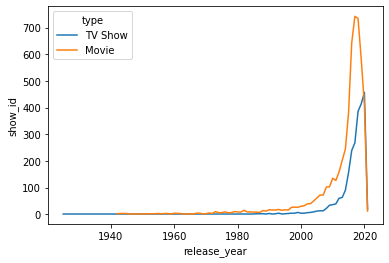

In [175]:
# creating Visualisation 
sns.lineplot(data = df_release_year, x= 'release_year', y = 'show_id', hue = 'type')

##### 1. Why did you pick the specific chart?

We used this plot to check the distribution of TV shows and movies across years.
Line plots are a useful tool for analyzing trends and patterns over time, especially when dealing with data across different years.

##### 2. What is/are the insight(s) found from the chart?

*  The insight that can be drawn is that the number of TV shows and movies on Netflix has increased significantly since 2010.
* The significant increase in the number of TV shows and movies on Netflix since 2010 could reflect the evolution of the streaming industry. As more consumers have shifted away from traditional cable and satellite TV, the demand for on-demand streaming services has increased. Netflix has responded to this trend by investing in its content library and expanding its offerings to attract more subscribers.
* Netflix is known for its data-driven decision-making approach, and the increase in the number of TV shows and movies on its platform could reflect the company's use of data to identify consumer preferences and trends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding audience preferences and trends, Netflix can continue to build a content library that meets the needs and preferences of its subscribers. This could help improve the overall customer experience and increase customer satisfaction, which could in turn lead to higher retention rates and increased revenue.

* By building a robust and diverse content library, Netflix can establish a competitive advantage over its rivals in the streaming industry. This can help attract more subscribers and increase market share, which could contribute to the overall success of the business.

#### Chart - 4

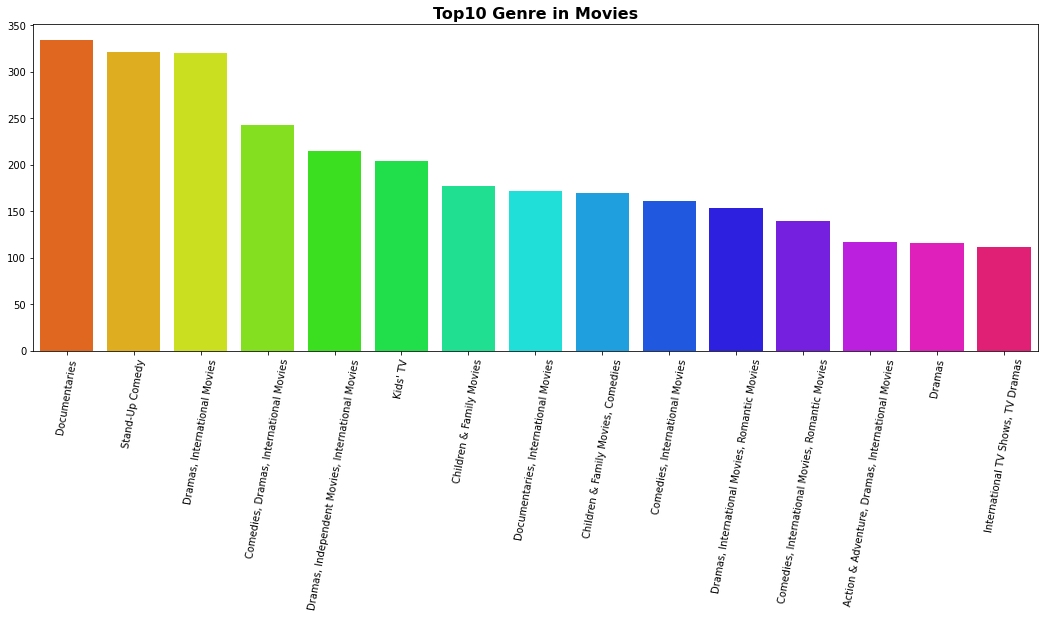

In [176]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are used to visualize and compare categorical data. We used bar plot to plot the average count of all the genres in our dataset. 

##### 2. What is/are the insight(s) found from the chart?

Documentaries, Stand-up Comedy, Drama, International movies and comedies are some of the highly popular content on the platform. the reason being people use ott platforms as the source of entertainment and they often love the content that is more relatable to their life and feel real.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could help Netflix make informed decisions about its content acquisition and production strategies. By understanding the popularity of different genres among its subscribers, Netflix can build a more diverse and appealing content library that meets the needs and preferences of its audience. This could help drive subscriber growth, increase engagement, and establish a competitive advantage in the streaming industry.

#### Chart - 5

In [177]:
df_duration = data.groupby(['duration'])['show_id'].count().sort_values(ascending= False).reset_index()
df_duration

duration  show_id
0     1 Season     1606
1    2 Seasons      378
2    3 Seasons      183
3       90 min      136
4       93 min      131
..         ...      ...
211    196 min        1
212    194 min        1
213    193 min        1
214     43 min        1
215    204 min        1

[216 rows x 2 columns]

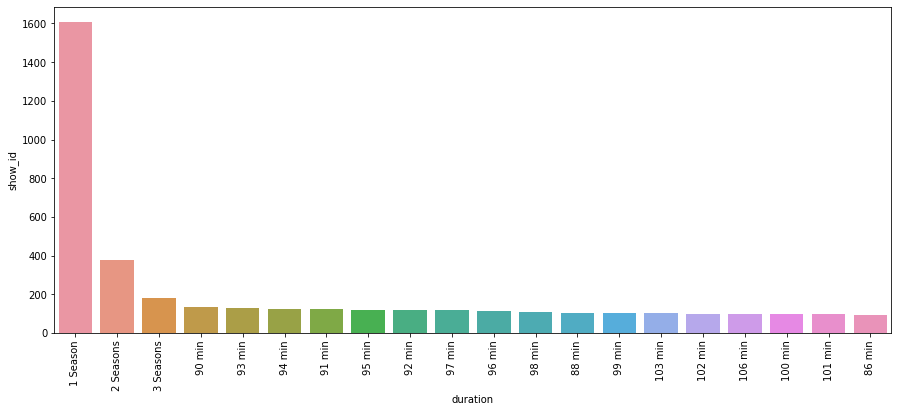

In [178]:
# Chart - 5 visualization code
plt.figure(figsize = (15, 6))
sns.barplot(data = df_duration, x = df_duration['duration'][:20], y = df_duration['show_id'])
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot here is used to plot the duration vs show-id count

##### 2. What is/are the insight(s) found from the chart?

* We can see that the maximum number of content in our data is related to Season 1, where the TV shows, movies or webseries made on the platform have atleast 1 season length.
* The fact that "Season 1" is the most frequent duration for TV shows on Netflix suggests that the streaming service typically organizes its original programming into seasons, rather than releasing episodes one-by-one or in smaller batches.
* The fact that "Season 1" is the most frequent duration for TV shows on Netflix could suggest that viewers are most likely to watch new shows when they are first released, rather than waiting for subsequent seasons to be released. This could be due to the marketing and promotion efforts that Netflix puts into new shows, or to the fact that viewers are more likely to be interested in a show when it is first released.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could be helpful in guiding Netflix's content acquisition and production strategies. By understanding the duration preferences of viewers, Netflix can make informed decisions about how to structure and release its original content, and how to allocate resources to produce content that resonates with its audience.

#### Chart - 6

In [179]:
# Chart - 6 visualization code
df_country = data.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
df_country

country     type  show_id
0                                        United States    Movie     2076
1                                        United States  TV Show      975
2                                                India    Movie      852
3                                       United Kingdom  TV Show      203
4                                       United Kingdom    Movie      193
..                                                 ...      ...      ...
768                           Indonesia, United States    Movie        1
769                                       Iran, France    Movie        1
770                                    Ireland, Canada    Movie        1
771  Ireland, Canada, Luxembourg, United States, Un...    Movie        1
772                                           Zimbabwe    Movie        1

[773 rows x 3 columns]

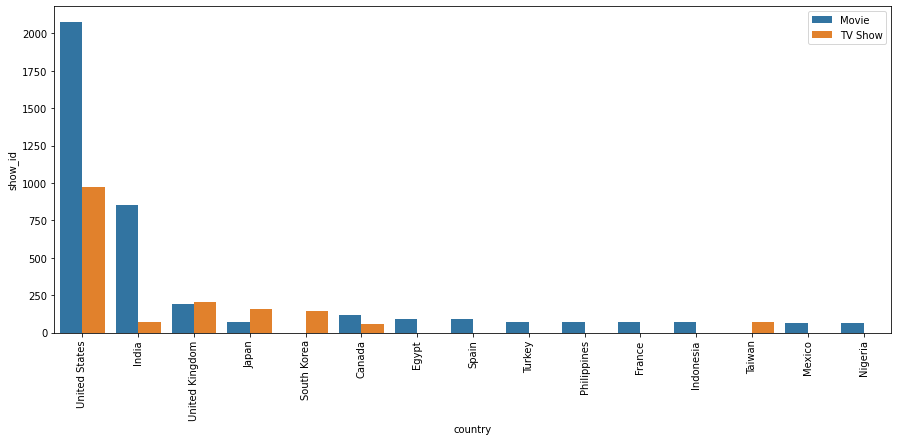

In [180]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df_country, x = df_country['country'][:20], y = df_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Here we are doing Bivariate analysis using bar plot to compare the number of movies and TV shows produced by different countries. Bivariate analysis bar plots are used to compare the relationship between two categorical variables.

##### 2. What is/are the insight(s) found from the chart?

USA and India are topmost countries in producing content over the platform.

* As both the USA and India have very distinct cultural identities, the high production volume of movies and TV shows from these countries could indicate that their culture and values are widely consumed and popular among audiences worldwide.
* The fact that USA and India are the top producers of movies and TV shows could indicate that these markets are more attractive for investment in the industry.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of the USA and India in the movie and TV show production industry is an important insight for the industry as it can help inform business decisions related to production, distribution, and marketing.

#### Chart - 7

<Figure size 1008x576 with 0 Axes>

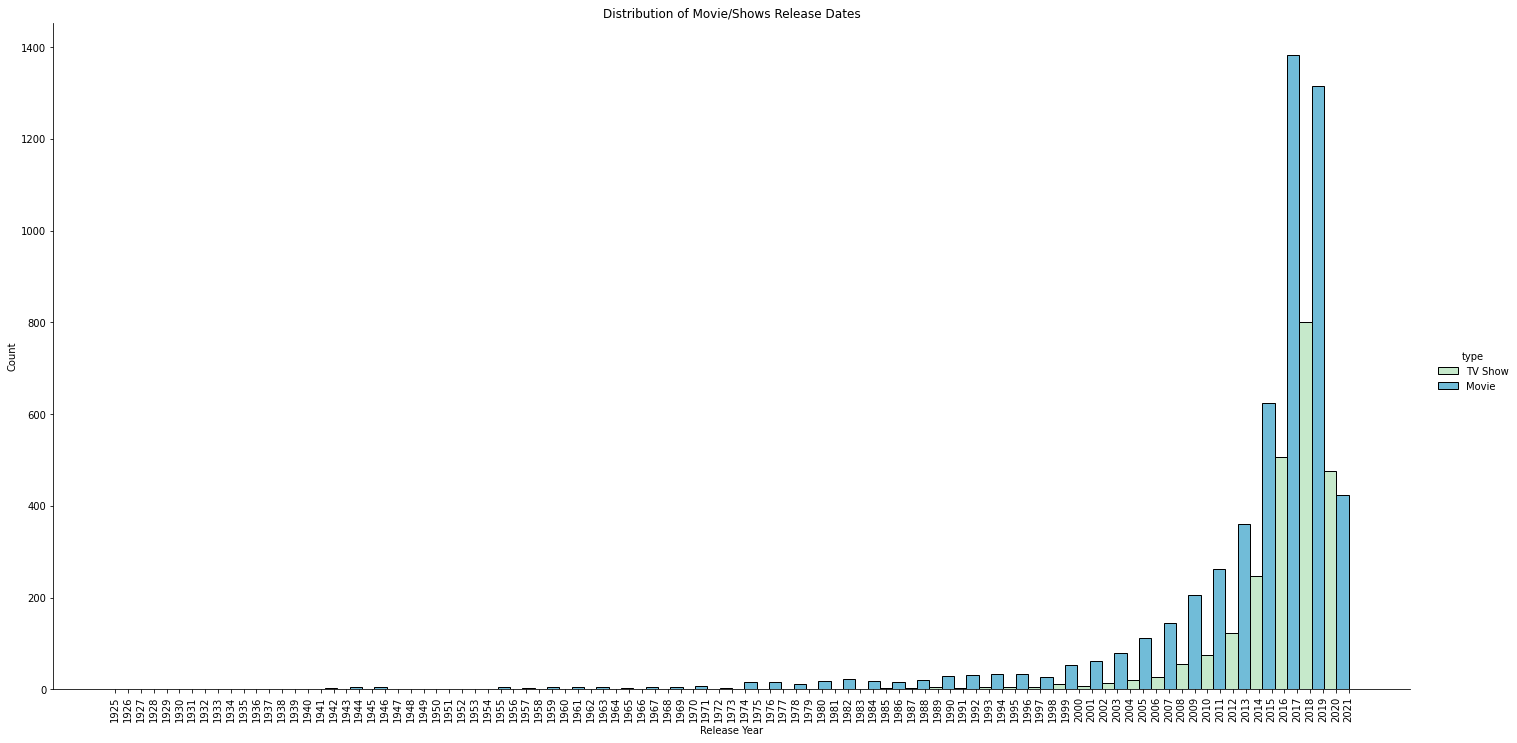

In [181]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = data, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(data.release_year.min(),data.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')


##### 1. Why did you pick the specific chart?

We picked histogram to visualize the concentration of movie and TV show releases over time, showing when the number of releases began to increase and decrease.

##### 2. What is/are the insight(s) found from the chart?

* There is rapid increase in content over the platform after 2010.
* In 2017, the maximum number of movies were released while in 2018 the maximum number of TV shows were released.
* Between 2017-2019, the maximum content is released or added to the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could be useful for understanding the growth trajectory of Netflix and for making informed decisions related to content strategy and marketing efforts.

#### Chart - 8

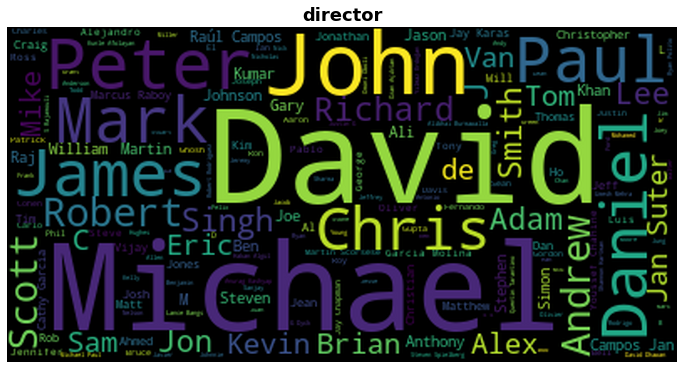

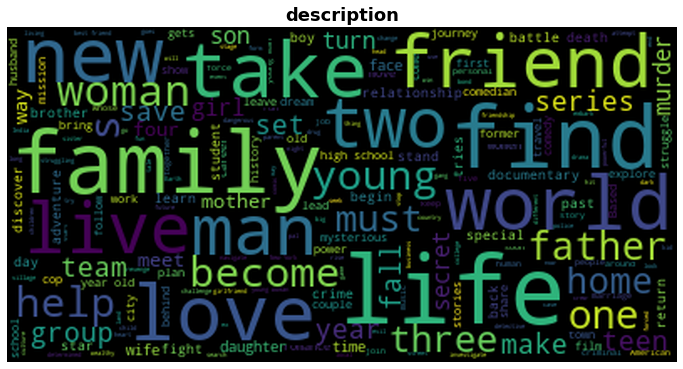

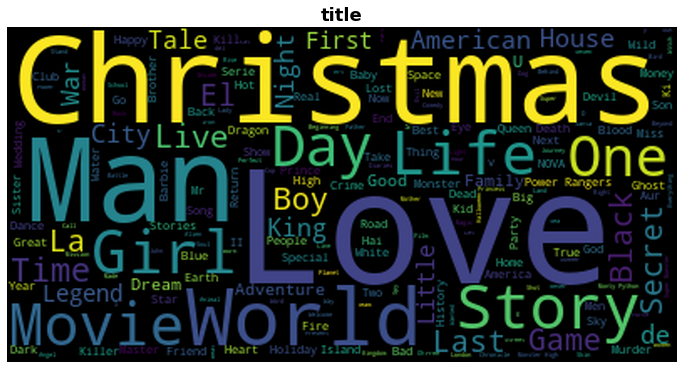

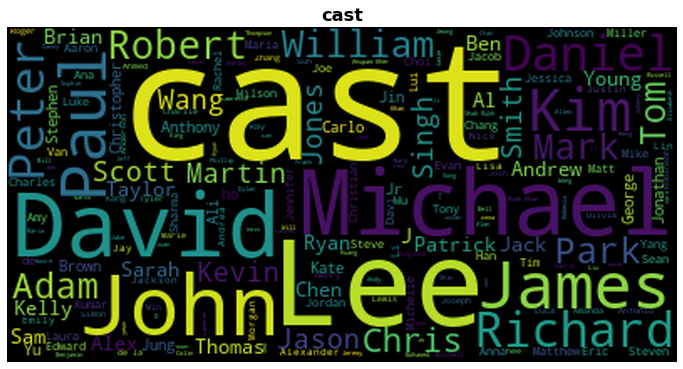

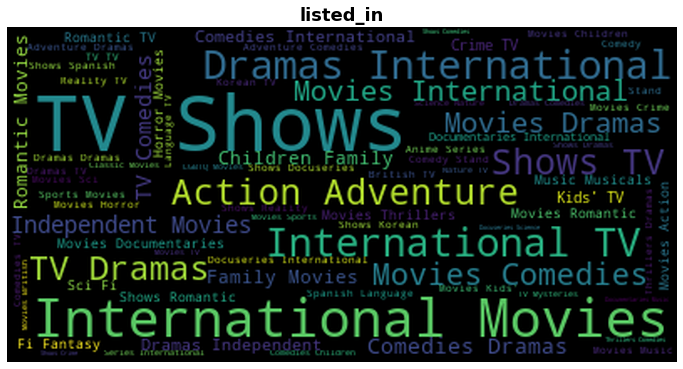

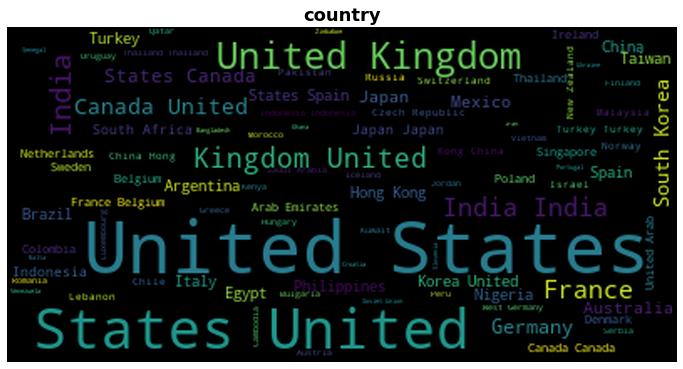

In [182]:
# Chart - 10 visualization code
features_for_wordplot = ['director', 'description', 'title', 'cast', 'listed_in', 'country']
for i in features_for_wordplot:

  df_word_cloud = data[i]
  text = " ".join(word for word in df_word_cloud)
  # Create stopword list:
  stopwords = set(STOPWORDS)        #stopwords set is used to remove these common words from the text before generating the word cloud.
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation='blackman')
  plt.axis("off")
  plt.title(i, fontsize=18, fontweight='bold')
  plt.show()

##### 1. Why did you pick the specific chart?

We used a word cloud plot to visualize the most frequently occurring words or terms in a given text or dataset. Word clouds are often used to provide a quick and intuitive visualization of the most important or relevant words, which can help identify key themes, topics, or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* In director, the most frequent director names are -: David, Michael, Johns, Daniel, Paul
* In description, the most frequently used words are-: find, love, life, live, man, woman, battle, help, friend etc. which suggests that movies often center around themes of relationships, personal growth, and overcoming obstacles.
* In cast, the most frequent actor names are-: Michael, James, David, John, Paul etc.
* In listed_in, the most frequent genres are-: international movies, dramas, action, adventure, international movies etc.
* In country, most frequent names are-: US, India, UK, Japan, Germany, Cannada etc.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

*  Netflix could use this information to tailor its content recommendations to users based on their location, genre preferences, and popular actors/directors. By understanding what types of movies are most popular in which countries, Netflix could produce more localized content and expand its subscriber base.

* Additionally, by identifying the most frequent keywords used in movie descriptions, Netflix could optimize its search algorithm to return more accurate results, and also use this information to craft more compelling movie synopses to entice users to watch.

* Overall, the insights gained from analyzing the Netflix dataset by the above word plot could be leveraged by Netflix to make better business decisions and provide a more personalized experience for its users, which could lead to increased subscriber satisfaction and revenue.

#### Chart - 9

In [183]:
#creating two new df's
tv_shows=data[data['type']=='TV Show']
movies=data[data['type']=='Movie']

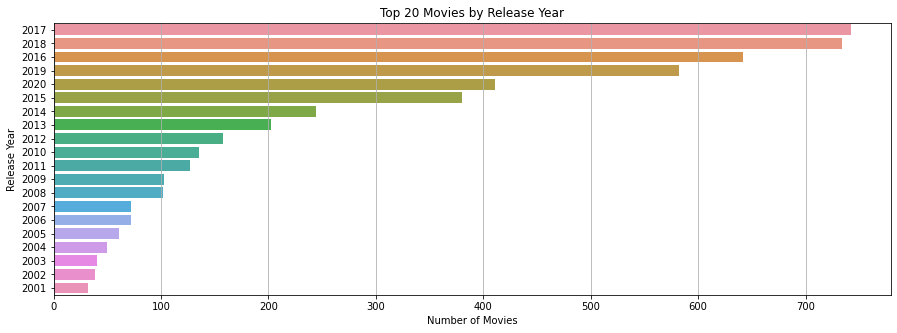

In [184]:
# Chart - 9 visualization code
plt.figure(figsize=(15,5))
sns.set_palette('bright')
sns.countplot(y=movies['release_year'],data=data,order=movies['release_year'].value_counts().index[0:20])
plt.title('Top 20 Movies by Release Year')
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.grid(axis='x')


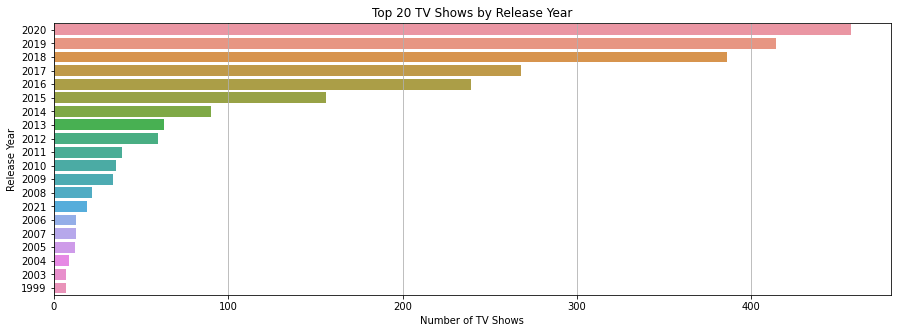

In [185]:
plt.figure(figsize=(15,5))
sns.set_palette('bright')
sns.countplot(y=tv_shows['release_year'],data=data,order=tv_shows['release_year'].value_counts().index[0:20])
plt.title('Top 20 TV Shows by Release Year')
plt.xlabel('Number of TV Shows')
plt.ylabel('Release Year')
plt.grid(axis='x')


##### 1. Why did you pick the specific chart?

We used this chart to plot the count of TV shows and movies differently.

##### 2. What is/are the insight(s) found from the chart?

* Maximum number of movies released or added is in the year 2018.
* Maximum number of TV shows released is in the year 2020, as it was covid time period and everyone is at their home, so netflix use this opportunity to give offers and quality content to the audiences that led to more release in movies and TV shows.
* We saw a huge increase in the number of movies and television episodes after 2014.

#### Chart - 10

In [186]:
# Chart - 10 visualization code
#adding columns of month and year of addition

data['month'] = pd.DatetimeIndex(data['date_added']).month
data.head()


show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  
0  In a future where the elite inhabit an island ...      8  
1  After a devastating earthquake hits Mexico Cit...     12  
2  When an army recruit is found dead, his fellow...     12  
3  In a postapocalyptic world, rag-doll robots hi...     11  
4  A brilliant group of students become card-coun...      1

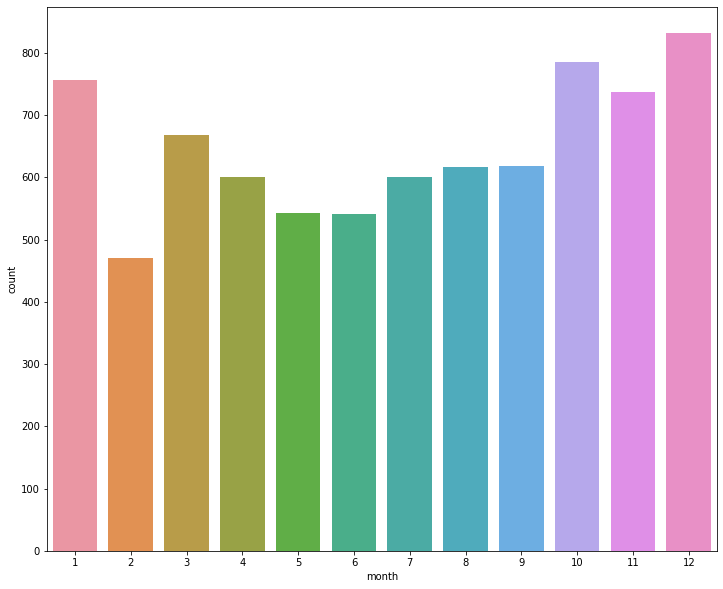

In [187]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('month',data= data)

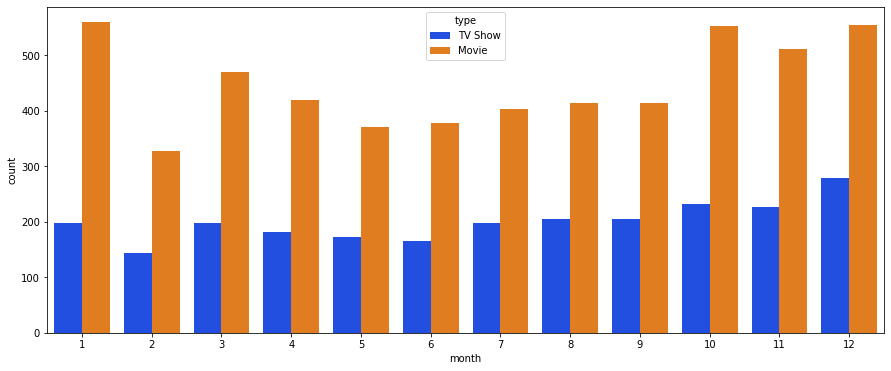

In [188]:
fig, ax = plt.subplots(figsize=(15,6)) #plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
                                       #Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax

sns.countplot(x='month', hue='type',lw=5, data=data, ax=ax)

##### 1. Why did you pick the specific chart?

Countplot is used to Show the counts of observations in each categorical bin using bars. We used this specific chart to check the count of TV shows and movies over month. 

##### 2. What is/are the insight(s) found from the chart?

Maximum number of content is released in the month of December followed by january.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be used to promote more targeted marketing strategies in specific months when the release is high. It can help drive more subsriptions to the platform and eventually more revenue.

#### Chart - 11

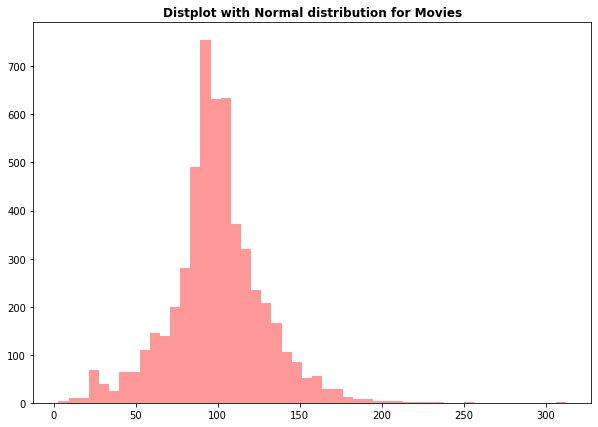

In [189]:
# Chart - 11 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

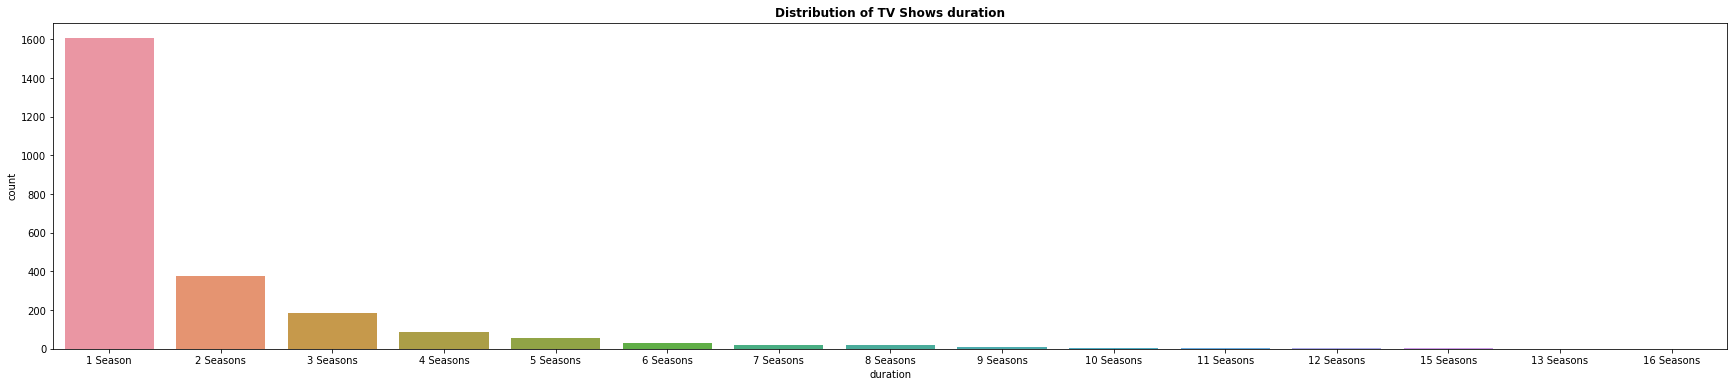

In [190]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

To check the distribution of duration feature for movies, and TV shows.

##### 2. What is/are the insight(s) found from the chart?

The variable named duration follow a distribution which is close to normal distribution, while there is highly skewed distribution for TV shows.

#### Chart - 12

In [191]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data


show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                        João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                                               Nasty C   
7785                                            Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  month  year_added  
0     In a future where the elite inhabit an island ...      8        2020  
1     After a devastating earthquake hits Mexico Cit...     12        2016  
2     When an

In [192]:
# All the movies and TV shows in different dataframe
movies = data[data['type']=='Movie']
tv_shows= data[data['type']=='TV Show']

([<matplotlib.patches.Wedge at 0x7fc03fc79af0>,
 [Text(-0.8900699117813855, -0.6463555926434588, 'Others'),
  Text(0.9709853583069661, 0.7051151919746822, 'Originals')],
 [Text(-0.48549267915348293, -0.3525575959873411, '69.99%'),
  Text(0.5664081256790635, 0.4113171953185646, '30.01%')])

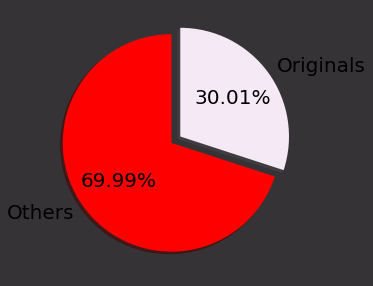

In [193]:
movies['originals'] = np.where(movies['release_year']==movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)        #This will make the "Originals" slice of the pie chart stand out a bit from the "Others" slice.
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])
     #The autopct parameter specifies that the percentage values should be displayed with 2 decimal places.

##### 1. Why did you pick the specific chart?

We used pie chart, with specifying several parameters to plot the difference between Netflix's original content and other content on the platform.

##### 2. What is/are the insight(s) found from the chart?

Netflix has over 30% original content which shows that netflix invests heavily in creating and promoting their own original content. This can be seen as part of Netflix's strategy to differentiate themselves from other streaming platforms and to maintain a competitive advantage.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By better understanding the popularity of original content versus other content on the platform, Netflix may be able to more effectively allocate its marketing budget to promote the most popular content, which can improve the overall performance of the platform and help maintain its subscriber base.

* By promoting their original content, Netflix can also build their brand recognition and reputation as a provider of high-quality and innovative content. 

* By understanding the popularity of original content on the platform can help Netflix make more informed decisions about content acquisition and retention, marketing, and brand management, which can ultimately lead to a positive business impact for the company.

#### Chart - 13 - Correlation Heatmap

In [194]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  
0  In a future where the elite inhabit an island ...      8        2020  
1  After a devastating earthquake hits Mexico Cit...     12        2016  
2  When an army recruit is found dead, his fellow...     12        2018  
3  In a postapocalyptic world, rag-doll robots hi...     11        2017  
4  A brilliant group of students become card-coun...      1        2020

In [195]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)


In [196]:
# Preparing data for heatmap
data['count'] = 1
df = data.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['country']

df_heatmap = data.loc[data['country'].isin(df)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.512626       0.471976  
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199

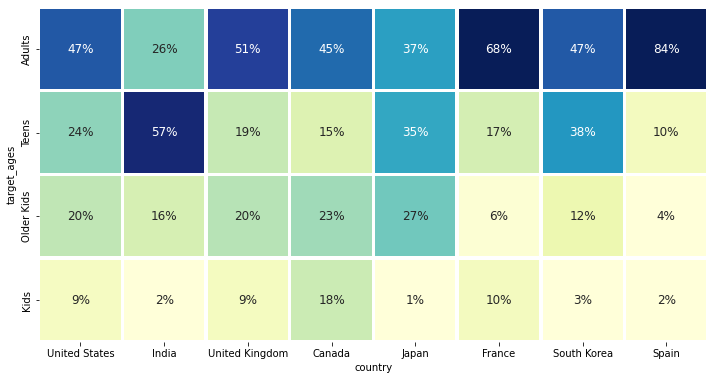

In [197]:
# Chart - 13 visualization code

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

plt.show()

##### 1. Why did you pick the specific chart?

To  visualize the distribution of the target_ages column across the top 10 countries with the most content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

US and UK are closely aligned with their Netflix target ages, means that people in both USA and UK prefer to watch similar type of content.

In similar way US and Canada are also highly aligned with their Netflix target ages.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at this heatmap, we can gain insights into how the content preferences of viewers in different countries may differ based on their age group, which can help inform content acquisition and localization strategies for Netflix.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [198]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [199]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [200]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### Textual Data Preprocessing 👇🏻

In [201]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month           0
year_added      0
target_ages     0
count           0
dtype: int64

The **inplace=True** argument specifies that the values in the original DataFrame should be updated, rather than returning a new DataFrame with the missing values filled in.

In [202]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   
3  In a postapocalyptic world, rag-doll robots hi...     11        2017   
4  A brilliant group of students become card-coun...      1        2020   

  target_ages  count  
0      Adults      1  
1      Adults      1  
2      Adults      1  
3       Teens      1  
4       Teens      1

In [203]:
#merging all text column to single text column to work with

data['organized'] =  data['description'] + ' ' + data['listed_in'] + ' ' + data['target_ages'] + ' ' + data['country']+ ' ' + data['cast'] + ' '+ data['director']


In [204]:
#filled all the missing value with empty strings
data['organized'] = data['organized'].fillna("")

In [205]:
data['organized'][2]

"When an army recruit is found dead, his fellow soldiers are forced to confront a terrifying secret that's haunting their jungle island training camp. Horror Movies, International Movies Adults Singapore Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim Gilbert Chan"

In [206]:
#text cleaning
import re
def cleaned(x):
    return re.sub(r"[^a-zA-Z ]","",str(x))
data['organized'] = data['organized'].apply(cleaned)

#### 2. Lower Casing

In [207]:
# Lower Casing
data['organized']= data['organized'].str.lower()

#### 3. Removing Punctuations

In [208]:
import string

def remove_punctuation(text):
    # Create a translation table to remove punctuation using the string module
    translator = str.maketrans('', '', string.punctuation)
    # Apply the translation table to remove punctuation from the text
    text = text.translate(translator)
    return text

In [209]:
data['organized'].apply(remove_punctuation)

0       in a future where the elite inhabit an island ...
1       after a devastating earthquake hits mexico cit...
2       when an army recruit is found dead his fellow ...
3       in a postapocalyptic world ragdoll robots hide...
4       a brilliant group of students become cardcount...
                              ...                        
7782    when lebanons civil war deprives zozo of his f...
7783    a scrappy but poor boy worms his way into a ty...
7784    in this documentary south african rapper nasty...
7785    dessert wizard adriano zumbo looks for the nex...
7786    this documentary delves into the mystique behi...
Name: organized, Length: 7770, dtype: object

#### 4. Removing Stopwords & Removing White spaces

In [210]:
#necessary import for nlp
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [211]:
# Removing Stopwords
def remove_stopwords(text):
    # Tokenizing the text into words
    words = nltk.word_tokenize(text)
    # Removing stopwords from the list of words
    words = [word for word in words if word.lower() not in stopwords.words('english')]
    # Joining the remaining words back into a single string
    text = ' '.join(words)
    return text


In [212]:
data['organized'].apply(remove_stopwords)

0       future elite inhabit island paradise far crowd...
1       devastating earthquake hits mexico city trappe...
2       army recruit found dead fellow soldiers forced...
3       postapocalyptic world ragdoll robots hide fear...
4       brilliant group students become cardcounting e...
                              ...                        
7782    lebanons civil war deprives zozo family hes le...
7783    scrappy poor boy worms way tycoons dysfunction...
7784    documentary south african rapper nasty c hits ...
7785    dessert wizard adriano zumbo looks next willy ...
7786    documentary delves mystique behind bluesrock t...
Name: organized, Length: 7770, dtype: object

#### 5. Text Normalization

In [213]:
#stemming
stemmer = SnowballStemmer('english')
stop_words = set(stopwords.words('english'))

In [214]:
# Remove URLs & Remove words and digits contain digits
#final word filter to be applied 
def stem_text(text):
    words = nltk.word_tokenize(text)  # tokenize the text into words
    stemmed_words = [stemmer.stem(word) for word in words]  # apply the Snowball stemmer to each word
    return ' '.join(stemmed_words)  # join the stemmed words back into a single string

# Apply the stem_text function to a column of a pandas DataFrame, such as a column called 'text'
data['org_new'] = data['organized'].apply(stem_text)

In [215]:
data.org_new

0       in a futur where the elit inhabit an island pa...
1       after a devast earthquak hit mexico citi trap ...
2       when an armi recruit is found dead his fellow ...
3       in a postapocalypt world ragdol robot hide in ...
4       a brilliant group of student becom cardcount e...
                              ...                        
7782    when lebanon civil war depriv zozo of his fami...
7783    a scrappi but poor boy worm his way into a tyc...
7784    in this documentari south african rapper nasti...
7785    dessert wizard adriano zumbo look for the next...
7786    this documentari delv into the mystiqu behind ...
Name: org_new, Length: 7770, dtype: object

In [216]:
data.org_new.iloc[0]

'in a futur where the elit inhabit an island paradis far from the crowd slum you get one chanc to join the save from squalor intern tv show tv drama tv scifi fantasi adult brazil joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi'

##### Which text normalization technique have you used and why?

We used Snowball stemmer because it is a popular choice for stemming in NLP because it supports multiple languages, is accurate and efficient, and can be customized to meet specific needs.

#### 6. Text Vectorization

In [217]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                      
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  \
0  In a future where the elite inhabit an island ...      8        2020   
1  After a devastating earthquake hits Mexico Cit...     12        2016   
2  When an army recruit is found dead, his fellow...     12        2018   
3  In a postapocalyptic world, rag-doll robots hi...     11        2017   
4  A brilliant group of students become card-coun...      1        2020   

  target_ages  count                                          organized  \
0      Adults      1  in a future where the elite inhabit an island ...   
1      Adults      1  after a devastating earthquake hits mexico cit...   
2      Adults      1  when an army recruit is found dead his fellow ...   
3       Teens      1  in a postapocalyptic world ragdoll robots hide...   
4       Teens      1  a brilliant group of students become cardcount...   

                                             org_new  
0  in a futur where the elit inhabit an island pa...  
1  after a devast earthquak hit mexico citi trap ...  
2  when an armi recruit is found dead his fellow ...  
3  in a postapocalypt world ragdol robot hide in ...  
4  a brilliant group of student becom cardcount e...

In [219]:
new_df = data[['title', 'org_new']]

In [220]:
new_df.head()

title                                            org_new
0     3%  in a futur where the elit inhabit an island pa...
1   7:19  after a devast earthquak hit mexico citi trap ...
2  23:59  when an armi recruit is found dead his fellow ...
3      9  in a postapocalypt world ragdol robot hide in ...
4     21  a brilliant group of student becom cardcount e...

In [221]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

In [222]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(new_df['org_new'])
     

In [223]:
X.shape

(7770, 20000)

##### Which text vectorization technique have you used and why?

Answer Here.

### **Dimensionality Reduction using PCA**

In [224]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X.toarray())

PCA()

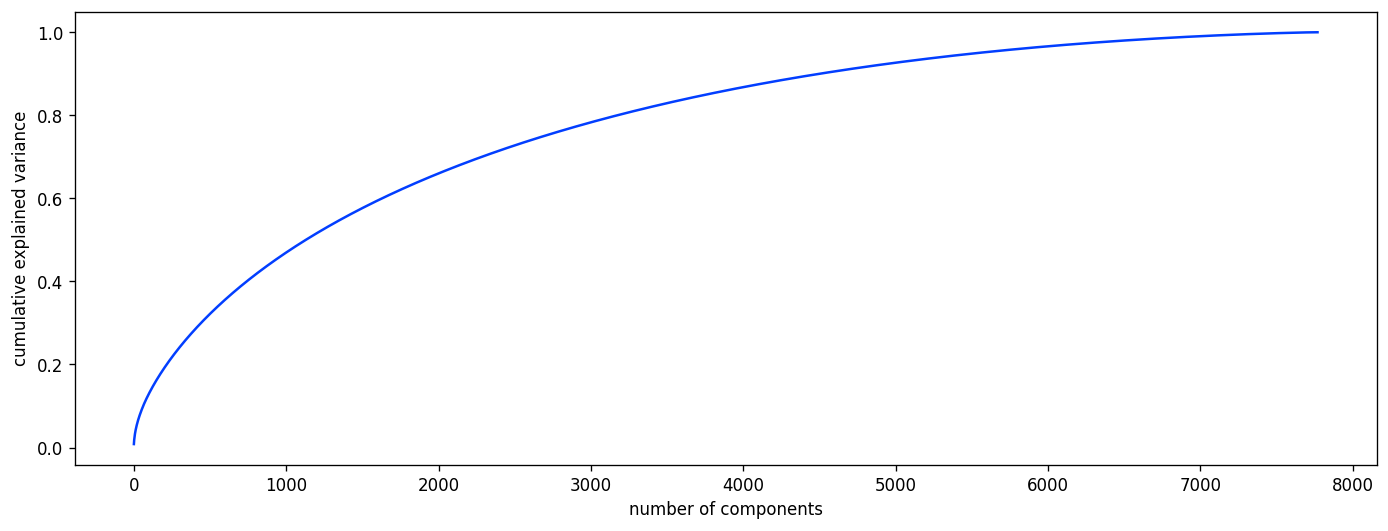

In [225]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(14,5), dpi=120)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

* We can see from the above plot almost 95% of the variance can be explained by 5000 components.
* Since choosing 5000 could be tricky we will set the value to be 95% in sklearn.

In [226]:
pca_tuned = PCA(n_components=0.95)
pca_tuned.fit(X.toarray())
X_transformed = pca_tuned.transform(X.toarray())
X_transformed.shape

(7770, 5538)

In [228]:
X_transformed

array([[ 1.15996649e-01, -3.41424552e-02, -3.35917606e-03, ...,
        -1.03733586e-02, -1.64457454e-03, -1.69043091e-03],
       [-4.44042706e-02, -4.09983062e-02,  2.91274232e-02, ...,
         7.33113424e-04, -4.95717098e-03, -2.42023917e-03],
       [-5.73724158e-02, -7.33925059e-02,  6.27926302e-03, ...,
        -1.49424768e-02, -3.11988936e-03, -5.94175177e-03],
       ...,
       [-5.40203474e-02,  1.84797100e-01,  1.17632958e-01, ...,
         6.59513020e-03, -1.35902989e-02, -1.42268468e-03],
       [ 1.04626918e-01,  1.15800069e-02, -1.78140703e-02, ...,
        -3.32700874e-03,  3.48699514e-03,  2.73920066e-04],
       [-3.27585017e-02,  3.80019629e-01,  1.13683798e-01, ...,
        -2.07012430e-03,  3.14158088e-03, -8.09865271e-04]])

# **ML Model Implementation**

# **Clustering Analysis**

 ## 1. **Silhoutte Score**

In [ ]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [230]:
from yellowbrick.cluster import SilhouetteVisualizer

In [231]:
from sklearn.metrics import silhouette_score, silhouette_samples

def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.0045172633896828265


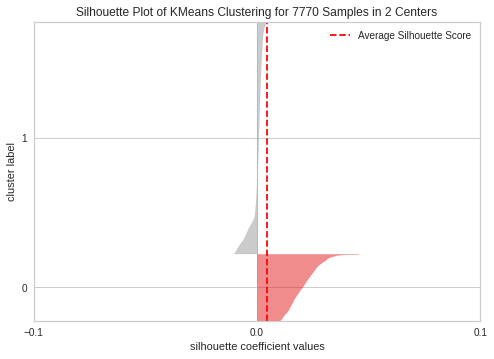

For n_clusters = 3, silhouette score is 0.0038109266448771353


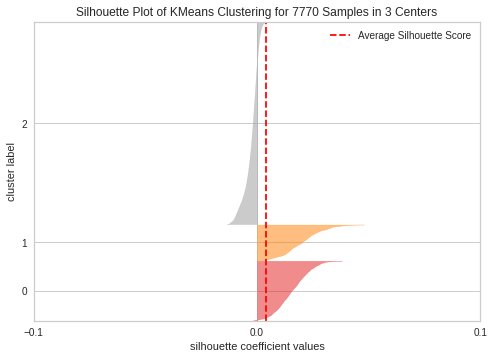

For n_clusters = 4, silhouette score is 0.0048836499030115105


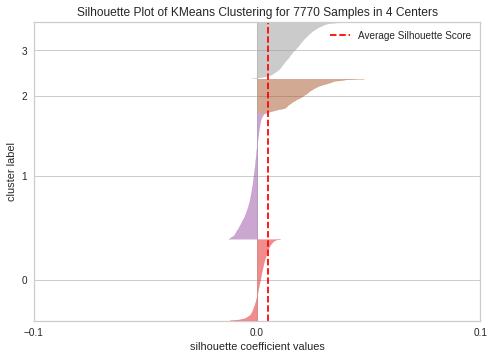

For n_clusters = 5, silhouette score is 0.00597147409215036


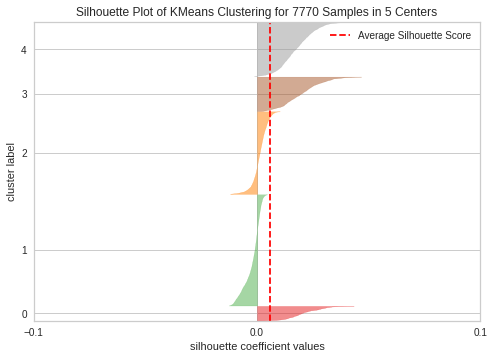

For n_clusters = 6, silhouette score is 0.006381530625763745


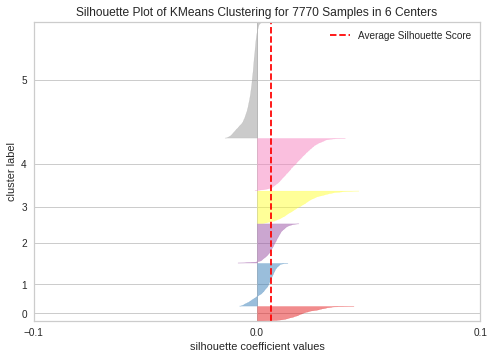

For n_clusters = 7, silhouette score is 0.003409289505094161


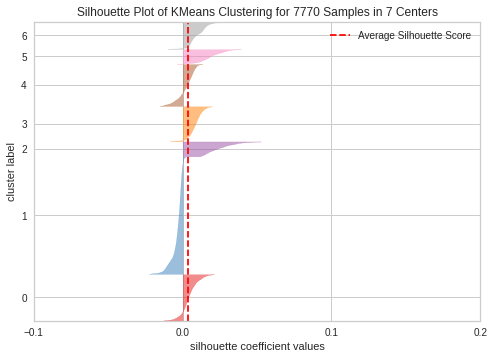

For n_clusters = 8, silhouette score is 0.0034279028868079912


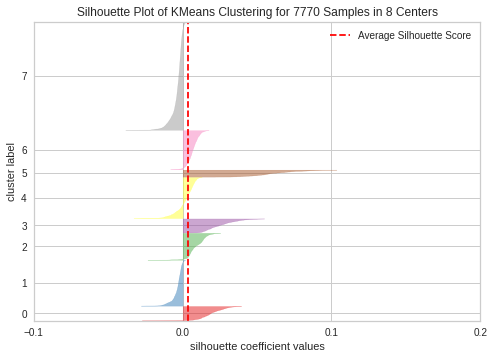

For n_clusters = 9, silhouette score is 0.003949227390022742


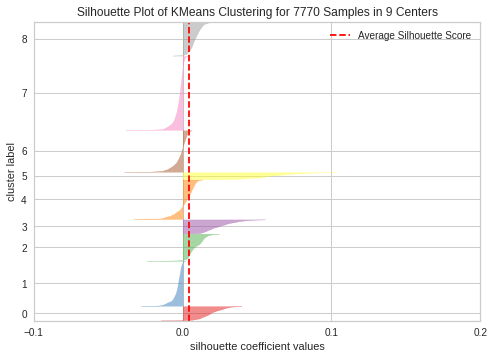

For n_clusters = 10, silhouette score is 0.004215109319360312


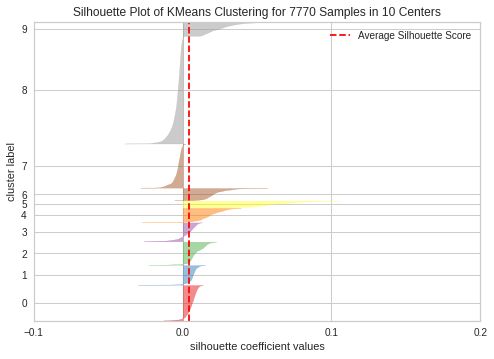

For n_clusters = 11, silhouette score is 0.004725070647026051


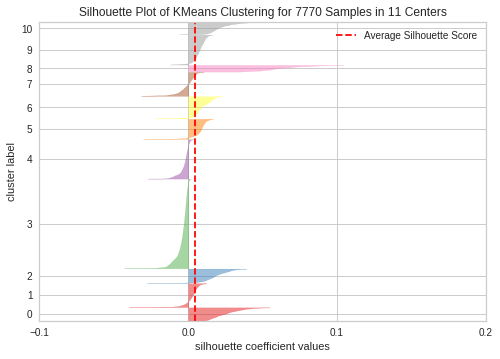

For n_clusters = 12, silhouette score is 0.005086648964509498


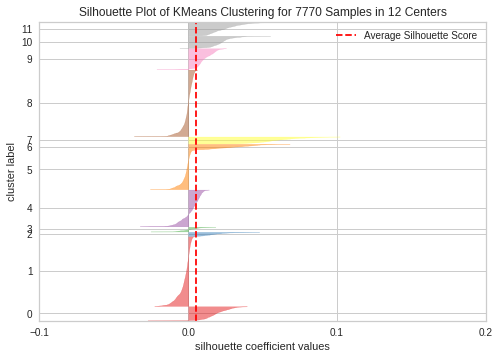

For n_clusters = 13, silhouette score is 0.005293937567101434


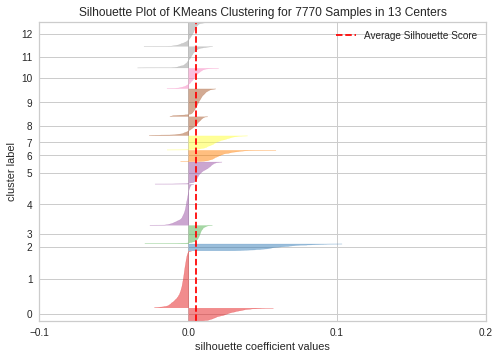

For n_clusters = 14, silhouette score is 0.00475271108975789


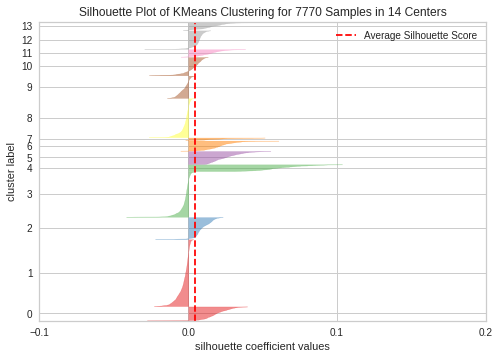

For n_clusters = 15, silhouette score is 0.005847581248582381


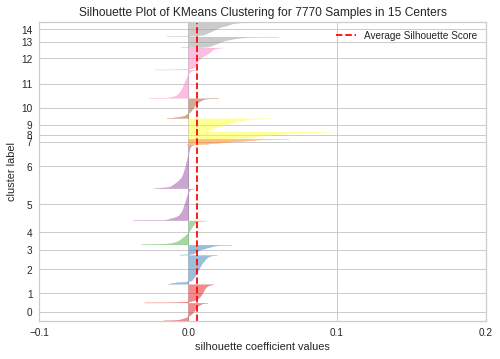

For n_clusters = 16, silhouette score is 0.006152989339931682


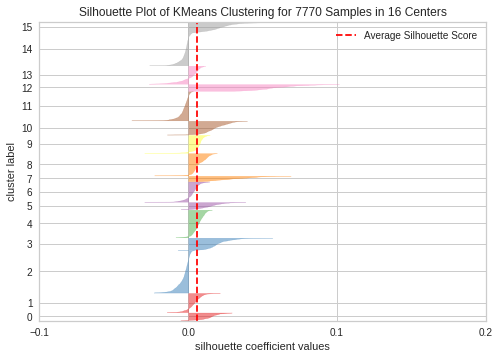

For n_clusters = 17, silhouette score is 0.006408624077408645


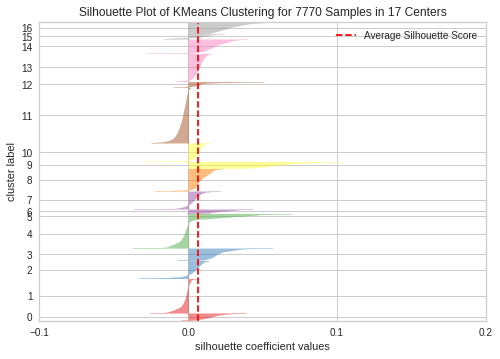

For n_clusters = 18, silhouette score is 0.006446619485225447


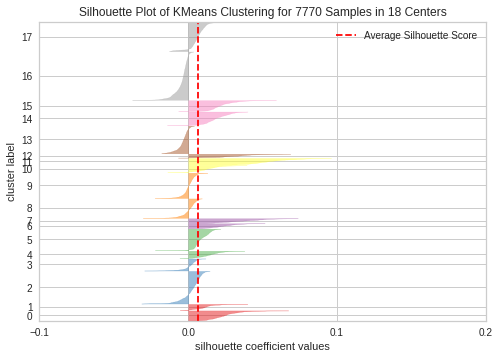

For n_clusters = 19, silhouette score is 0.005587500522661352


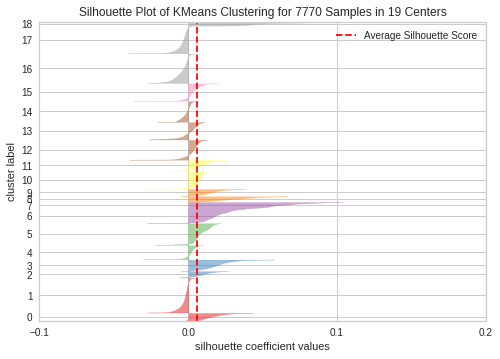

For n_clusters = 20, silhouette score is 0.00519657193049808


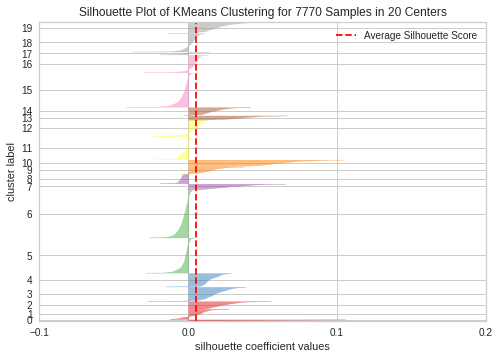

For n_clusters = 21, silhouette score is 0.006090571050957468


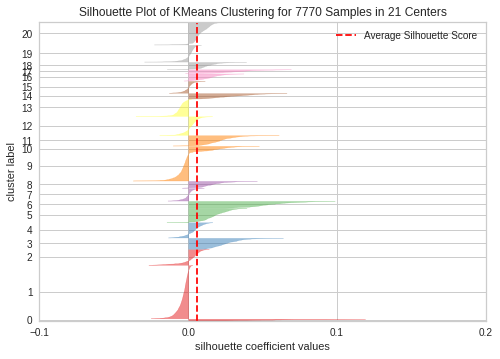

In [232]:
silhouette_score_analysis(22)

 ## 2.  **Elbow Method**

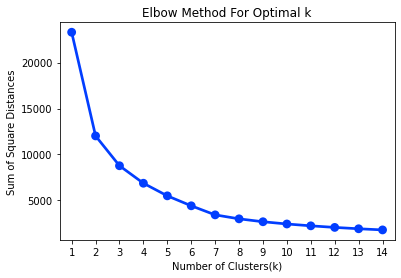

In [ ]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3 )
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
     

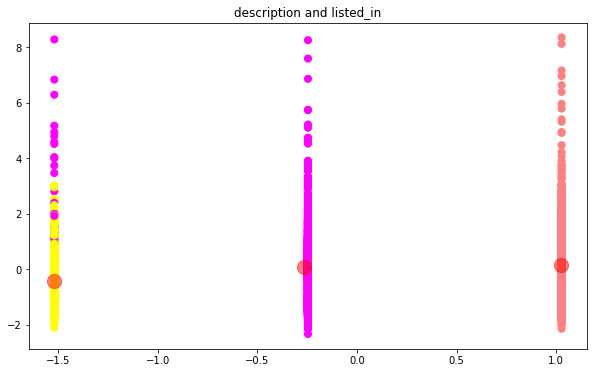

In [ ]:
plt.figure(figsize=(10 , 6))
plt.title('description and listed_in')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## 3. **Dendogram**

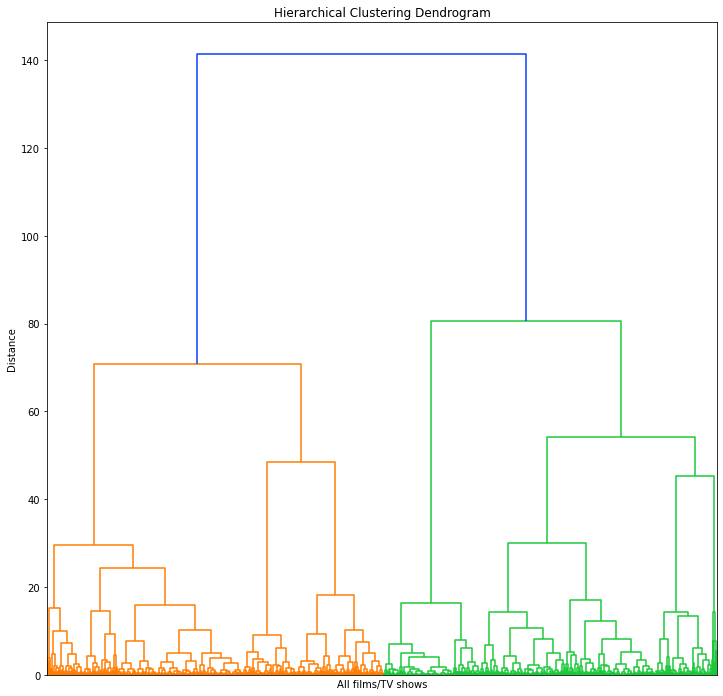

In [ ]:
#import libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(X,
                            method = 'ward', 
                            metric = 'euclidean')
                      
plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

## 4. **Agglomerative Clustering**

In [ ]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

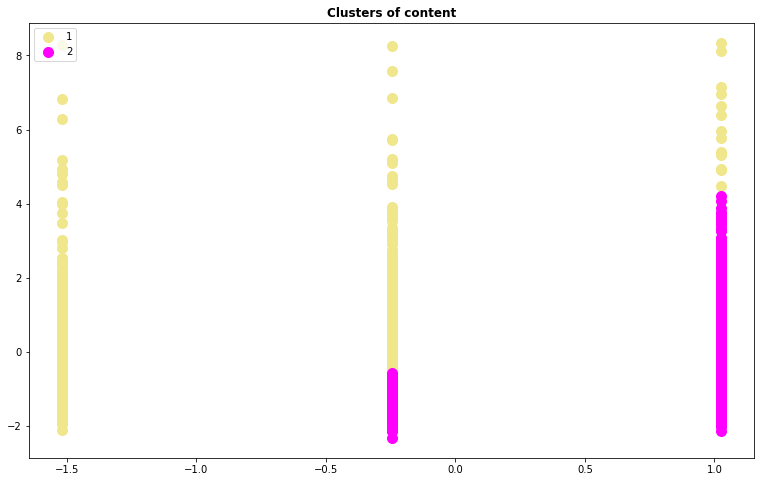

In [ ]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'khaki', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'magenta', label = '2')

# plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content',fontsize=12,fontweight='bold')

plt.legend()
plt.show()
     

## **Recommender System**

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

In [ ]:
#get the tf-idf scores
#create TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['org_new'])

#shape of tfidf_matrix
tfidf_matrix.shape

(7770, 41972)

In [ ]:
pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf.get_feature_names(), columns=["tf-idf score"])


tf-idf score
aa                   0.0
aabha                0.0
aachal               0.0
aacharekar           0.0
aadarsh              0.0
...                  ...
zynn                 0.0
zynnel               0.0
zyol                 0.0
zyon                 0.0
zyurtlu              0.0

[41972 rows x 1 columns]

In [ ]:
#CountVectorizer: Convert a collection of text documents to a matrix of token counts
#TfidfTransformer: Transform a count matrix to a normalized tf or tf-idf representation

from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfid', TfidfTransformer())]).fit(data['org_new'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(data['org_new']).toarray()))
print("CountVectorizer_matrix: {}".format(pipe['tfid'].idf_))
     

CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CountVectorizer_matrix: [9.26500695 9.26500695 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [ ]:
#The lower the IDF value of a word, the less unique it is to any particular document
pd.DataFrame(pipe['tfid'].idf_, index=pipe['cv'].get_feature_names(), columns=['idf_weights'])

idf_weights
aa             9.265007
aabha          9.265007
aachal         9.265007
aacharekar     9.265007
aadarsh        8.859542
...                 ...
zynn           9.265007
zynnel         9.265007
zyol           9.265007
zyon           9.265007
zyurtlu        9.265007

[41972 rows x 1 columns]

Write limitation of tfidf here and use of cosine similarity instead of tfidf

### **Using Cosine Similarity**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix)

In [ ]:
programme_list=data['title'].to_list()

In [ ]:
def recommend(title, cosine_similarity=cosine_sim):
    index = programme_list.index(title)
    sim_score = list(enumerate(cosine_sim[index]))
    
    #position 0 is the movie itself, thus exclude
    sim_score = sorted(sim_score, key= lambda x: x[1], reverse=True)[1:11] 
    recommend_index = [i[0] for i in sim_score]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1],4) for i in sim_score]
    rec_table = pd.DataFrame(list(zip(rec_movie,rec_score)), columns=['Recommend programme','Similarity(0-1)'])
    return rec_table
     

In [ ]:
recommend("Indiana Jones and the Last Crusade")

Recommend programme  Similarity(0-1)
0      Indiana Jones and the Raiders of the Lost Ark           0.2778
1  Indiana Jones and the Kingdom of the Crystal S...           0.1748
2               Indiana Jones and the Temple of Doom           0.1533
3                                            Lincoln           0.1303
4                                         Pawn Stars           0.1114
5                    Monty Python and the Holy Grail           0.1034
6                                   A Bridge Too Far           0.0959
7                               The Battle of Midway           0.0929
8                   Joan Rivers: Don't Start with Me           0.0922
9                                         Pajanimals           0.0901

In [ ]:
recommend('Betaal')

Recommend programme  Similarity(0-1)
0                    Poshter Girl           0.1291
1                     Manusangada           0.0900
2                    Agent Raghav           0.0892
3            Tikli and Laxmi Bomb           0.0833
4                 Bhool Bhulaiyaa           0.0821
5  Gunjan Saxena: The Kargil Girl           0.0809
6                            Loev           0.0780
7                         Tukaram           0.0772
8           Pyaar Ke Side Effects           0.0763
9                Queens vs. Kings           0.0754

In [ ]:
recommend('Zindagi Na Milegi Dobara')

Recommend programme  Similarity(0-1)
0      Luck by Chance           0.2626
1     Dil Dhadakne Do           0.2107
2             Lakshya           0.1671
3      Bombay Talkies           0.1517
4                Zero           0.1490
5               Don 2           0.1474
6               Dev.D           0.1466
7       Ghost Stories           0.1435
8            Shanghai           0.1382
9             Waiting           0.1373

In [ ]:
recommend('Iron Man: Armored Adventures')

Recommend programme  Similarity(0-1)
0           NOVA: Secrets of the Shining Knight           0.1158
1                                      LoliRock           0.1141
2           LEGO Jurassic World: Secret Exhibit           0.1130
3       Marvel's Iron Man & Hulk: Heroes United           0.1082
4  Strawberry Shortcake: Berry Bitty Adventures           0.1043
5                                   Planet Hulk           0.0966
6                 Barbie: Princess Charm School           0.0957
7        Little Baby Bum: Nursery Rhyme Friends           0.0922
8                        Kong: King of the Apes           0.0911
9                         Thor: Tales of Asgard           0.0898

In [ ]:
recommend('Shootout at Lokhandwala')

Recommend programme  Similarity(0-1)
0  Mission Istaanbul: Darr Ke Aagey Jeet Hai           0.2741
1                           Kyun! Ho Gaya Na           0.2298
2                     Kabhi Alvida Naa Kehna           0.1586
3                                     Lagaan           0.1519
4                             Action Replayy           0.1488
5                              Hello Brother           0.1475
6                            Golmaal Returns           0.1420
7                                     Kisaan           0.1419
8                            Mumbai Cha Raja           0.1416
9                                    Kurbaan           0.1355

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***